In [1]:
import cPickle, string, numpy, getopt, sys, random, time, re

import onlineldavb

## Fetch a corpus

In [2]:
categories = ['cute', 'weather']
documents = ['adorable panda cloud', 'adorable rainy cloud', 'rainy cloud panda', 'adorable panda rainy',  'adorable adorable panda']

## Set parameters for SVI

In [3]:
K = len(categories) #Number of topics
D = len(documents) #Number of documents
batchsize = 4
num_iterations = 1000

## Get vocabulary

In [4]:
vocab = ['panda', 'adorable', 'rainy', 'cloud']

In [5]:
vocab

['panda', 'adorable', 'rainy', 'cloud']

## Function to get mini-batch

In [6]:
from random import sample

def getbatch(size, iteration):
    sample_idx = sample(range(D), size)
    return [documents[i] for i in sample_idx]

## Train LDA model using SVI

In [7]:
print "Parameters: \n\t Num topics: %d \n\t Num documents: %d" % (K, D)
print "\t prior on weight vectors (theta): %4.2f \n\t prior on topics (beta): %4.2f" % (1./K, 1./K)
print "\t burn in rate: %4.2f \n\t learning rate: %4.2f" % (1024., 0.7)

rho = []
perplex = []

olda = onlineldavb.OnlineLDA(vocab, K, D, 1./K, 1./K, 1024., 0.7)
for iteration in range(0, num_iterations):
    docset=getbatch(batchsize,iteration)
    (gamma, bound) = olda.update_lambda(docset)
    (wordids, wordcts) = onlineldavb.parse_doc_list(docset, olda._vocab,False)
    perwordbound = bound * len(docset) / (D * sum(map(sum, wordcts)))
    rho.append(olda._rhot,)
    perplex.append(numpy.exp(-perwordbound))
    
    if (iteration % 50 == 0):
        print "Training iteration %d" % iteration
            
print "Done training"

Parameters: 
	 Num topics: 2 
	 Num documents: 5
	 prior on weight vectors (theta): 0.50 
	 prior on topics (beta): 0.50
	 burn in rate: 1024.00 
	 learning rate: 0.70
Training iteration 0
Training iteration 50
Training iteration 100
Training iteration 150
Training iteration 200
Training iteration 250
Training iteration 300
Training iteration 350
Training iteration 400
Training iteration 450
Training iteration 500
Training iteration 550
Training iteration 600
Training iteration 650
Training iteration 700
Training iteration 750
Training iteration 800
Training iteration 850
Training iteration 900
Training iteration 950
Done training


## Convergence visualization

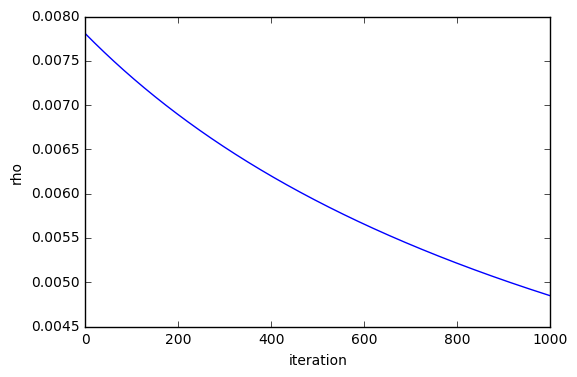

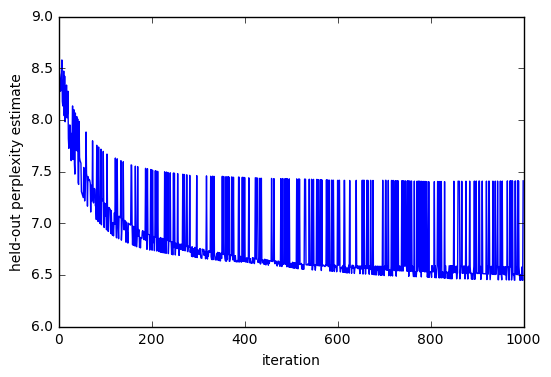

In [8]:
from matplotlib import pyplot as plt

plt.figure()
plt.plot(range(len(rho)), rho)
plt.ylabel('rho')
plt.xlabel('iteration')
plt.show()

plt.figure()
plt.plot(range(len(perplex)), perplex)
plt.ylabel('held-out perplexity estimate')
plt.xlabel('iteration')
plt.show()

## Print vocabulary per topic

In [9]:
num_vocab_display = 4

for k in range(0, len(olda._lambda)):
    lambdak = list(olda._lambda[k, :])
    lambdak = lambdak / sum(lambdak)
    temp = zip(lambdak, range(0, len(lambdak)))
    temp = sorted(temp, key = lambda x: x[0], reverse=True)
    print 'topic %d:' % (k)
    for i in range(0, num_vocab_display):
        print '%20s  \t---\t  %.4f' % (vocab[temp[i][1]], temp[i][0])
    print

topic 0:
               cloud  	---	  0.3530
               rainy  	---	  0.3475
               panda  	---	  0.1973
            adorable  	---	  0.1022

topic 1:
            adorable  	---	  0.5173
               panda  	---	  0.3232
               rainy  	---	  0.0811
               cloud  	---	  0.0784

